In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
bank_data = pd.read_csv('bank_data.csv')
bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [26]:
# Checking the unique values in the 'recovery_strategy' column
unique_strategies = bank_data['recovery_strategy'].unique()
unique_strategies.sort()
unique_strategies

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [27]:
# Calculating the average actual recovery amount for each recovery strategy level
average_recovery_by_strategy = bank_data.groupby('recovery_strategy')['actual_recovery_amount'].mean()
average_recovery_by_strategy

recovery_strategy
Level 0 Recovery      521.027126
Level 1 Recovery     1301.689329
Level 2 Recovery     2916.915341
Level 3 Recovery     6186.464786
Level 4 Recovery    12428.197233
Name: actual_recovery_amount, dtype: float64

In [28]:
# Calculating the difference in average recovery amounts between each adjacent level
difference_in_recovery = average_recovery_by_strategy.diff().dropna()
difference_in_recovery_comparison = difference_in_recovery - 50
difference_in_recovery_comparison


recovery_strategy
Level 1 Recovery     730.662203
Level 2 Recovery    1565.226012
Level 3 Recovery    3219.549445
Level 4 Recovery    6191.732446
Name: actual_recovery_amount, dtype: float64

As the bank went up the recovery level ladder, each of these values represents the increase in the average recovery amount at a higher strategy after deducting the associated $50 assosciated with that level.

In other words, the bank's strategy of putting more effort and incurring additional costs at higher recovery levels appears to be effective, as the increase in recovery amounts at each level significantly exceeds the additional $50 spent. 

###### Age vs Expected Recovery Amount

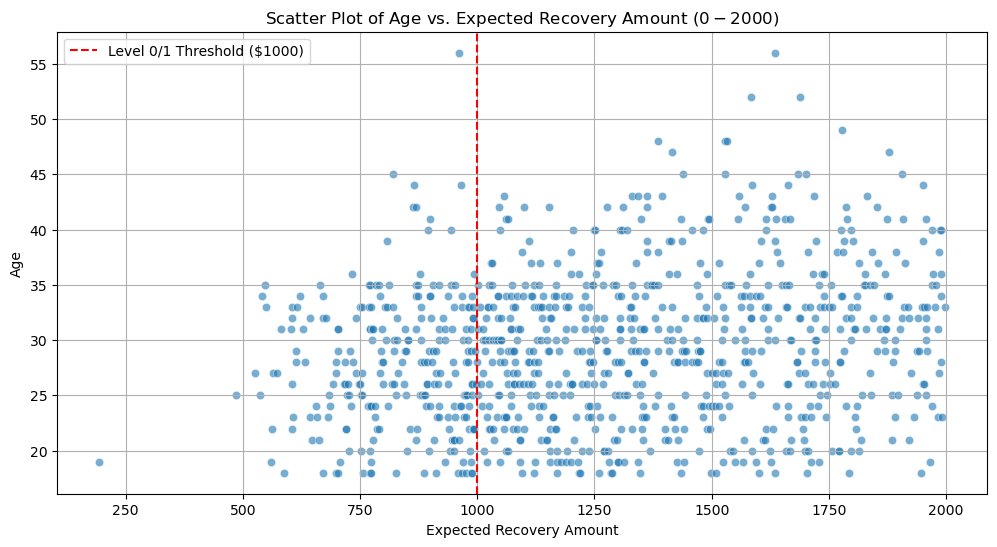

In [29]:
# Filtering the data for Expected Recovery Amounts between $0 and $2000
window_data = bank_data[(bank_data['expected_recovery_amount'] > 0) & (bank_data['expected_recovery_amount'] <= 2000)]

# Creating a scatter plot of age vs. Expected Recovery Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', data=window_data, alpha=0.6)

# Adding a vertical line at the $1000 threshold
plt.axvline(x=1000, color='red', linestyle='--', label='Level 0/1 Threshold ($1000)')

plt.title('Scatter Plot of Age vs. Expected Recovery Amount ($0 - $2000)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot above illustrates the relationship between age and the expected recovery amount for amounts ranging from 0 USD to 2000 USD. The red dashed line represents the $1000 threshold that separates Level 0 and Level 1 recovery strategies.

From the plot, we can observe the following:

- There does not appear to be a clear jump or discontinuity in age at the $1000 threshold. The distribution of ages seems relatively smooth across this threshold.

- The ages are spread across the entire range of expected recovery amounts without any obvious pattern indicating a systematic change at the $1000 mark.

This suggests that age, as a factor, does not show a distinct change or discontinuity at the threshold between the two recovery strategy levels. Therefore, it seems unlikely that age is a significant variable influencing the transition between Level 0 and Level 1 recovery strategies in terms of expected recovery amounts.

###### t-test to test the effect of age on expected recovery amount

To statistically examine whether there's a significant difference in the average age of customers just above and just below the $1000 threshold in Expected Recovery Amount, we can perform a hypothesis test. This test will compare the average ages of two groups:

Customers with Expected Recovery Amounts between \$900 and \$1000 (just below the threshold).

Customers with Expected Recovery Amounts between \$1001 and \$1100 (just above the threshold).
The hypothesis for our test will be:

Null Hypothesis (H0): There is no significant difference in the average age of customers just below and just above the $1000 threshold.

Alternative Hypothesis (H1): There is a significant difference in the average age of customers just below and just above the $1000 threshold.

In [30]:
# Extracting subsets of data
below_threshold = bank_data[(bank_data['expected_recovery_amount'] >= 900) & (bank_data['expected_recovery_amount'] <= 1000)]
above_threshold = bank_data[(bank_data['expected_recovery_amount'] > 1000) & (bank_data['expected_recovery_amount'] <= 1100)]

# Conducting a t-test
t_stat, p_value = stats.ttest_ind(below_threshold['age'], above_threshold['age'], equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -1.6090357512691353
P-value: 0.10938147433215123


- p-value>0.05. 
- Failed to reject null hypothesis. 
- no significant difference in the average age of customers just below and just above the 1000 USD threshold in expected recovery amounts.

Therefore, based on this analysis, age does not appear to vary systematically across the $1000 threshold, supporting the idea that differences in actual recovery amounts are more likely due to the recovery strategy rather than age-related factors.

###### Sex vs Expected Recovery Amount

In [31]:
# Creating a contingency table for the chi-squared test

contingency_table = pd.crosstab(
    index=(bank_data['expected_recovery_amount'] > 1000) & (bank_data['expected_recovery_amount'] <= 1100),
    columns=bank_data['sex']
)

# Conducting the chi-squared test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)


print(f'Chi-squared statistic:  {chi2_stat}')
print(f'P-value: {p_val}')


Chi-squared statistic:  1.2872311408308033
P-value: 0.25655884380945315


- p-value > 0.05. 
- Failed to reject the null hypothesis of independence. I
- no significant difference in the distribution of sexes just below and just above the $1000 threshold in expected recovery amounts.

Therefore, based on this analysis, the sex of the customers does not appear to vary systematically across the $1000 threshold, further supporting the idea that differences in actual recovery amounts are more likely due to the recovery strategy rather than differences in the distribution of sexes.

In [32]:
# Testing for several windows

In [33]:
# Filtering data for Expected Recovery Amounts between $900 and $1100
data_900_1100 = bank_data[(bank_data['expected_recovery_amount'] >= 900) & (bank_data['expected_recovery_amount'] <= 1100)]

# Creating a contingency table for the chi-squared test
contingency_table_900_1100 = pd.crosstab(
    index=(data_900_1100['expected_recovery_amount'] > 1000),
    columns=data_900_1100['sex']
)

# Conducting the chi-squared test
chi2_stat_900_1100, p_val_900_1100, dof_900_1100, ex_900_1100 = stats.chi2_contingency(contingency_table_900_1100)

chi2_stat_900_1100, p_val_900_1100


(0.49435761688866475, 0.48198988397369014)

1. Customers with Expected Recovery Amounts between $900 and $1000 (just below the threshold).
2. Customers with Expected Recovery Amounts between $1001 and $1100 (just above the threshold).

- Chi-squared statistic: 0.494
- P-value: 0.482

The chi-squared statistic of 0.494, coupled with a p-value of 0.482, indicates that there is no significant difference in the proportion of male customers just below and just above the $1000 threshold. A p-value greater than 0.05 suggests that we do not have sufficient evidence to reject the null hypothesis of no difference in the proportion of male customers across this threshold.

This result supports the conclusion that the percentage of customers who are male does not show a significant jump across the $1000 threshold in expected recovery amounts, for the range of $900 to $1100. This adds to the evidence that differences in actual recovery amounts are likely due to the recovery strategy rather than changes in customer demographics around this threshold.


In [34]:
# Defining different ranges around the $1000 threshold
ranges = [(950, 1050), (800, 1200), (850, 1150)]

# Results dictionary to store chi-squared statistics and p-values for each range
range_results = {}

# Performing chi-squared tests for each range
for lower, upper in ranges:
    # Filtering data for the specified range
    data_range = bank_data[(bank_data['expected_recovery_amount'] >= lower) & (bank_data['expected_recovery_amount'] <= upper)]

    # Creating a contingency table for the chi-squared test
    contingency_table_range = pd.crosstab(
        index=(data_range['expected_recovery_amount'] > 1000),
        columns=data_range['sex']
    )

    # Conducting the chi-squared test
    chi2_stat_range, p_val_range, _, _ = stats.chi2_contingency(contingency_table_range)
    range_results[(lower, upper)] = (chi2_stat_range, p_val_range)

range_results


{(950, 1050): (0.003709061236600946, 0.9514372067298551),
 (800, 1200): (0.15070170671133973, 0.6978656821999862),
 (850, 1150): (0.29069794610461575, 0.5897736168259035)}

1. Range $950 to $1050:
   - Chi-squared statistic: 0.004
   - P-value: 0.951

2. Range $800 to $1200:
   - Chi-squared statistic: 0.151
   - P-value: 0.698

3. Range $850 to $1150:
   - Chi-squared statistic: 0.291
   - P-value: 0.590

- p-values > 0.05.
- no significant difference in the proportion of male customers across the $1000 threshold for these ranges. 

The results consistently support the conclusion that the percentage of customers who are male does not show a significant jump across the $1000 threshold, regardless of the specific range considered around this threshold.

These findings reinforce the idea that the differences in actual recovery amounts are likely due to the recovery strategy rather than changes in the gender distribution of customers around the threshold.


##### Expected vs. Actual Recovery Amount

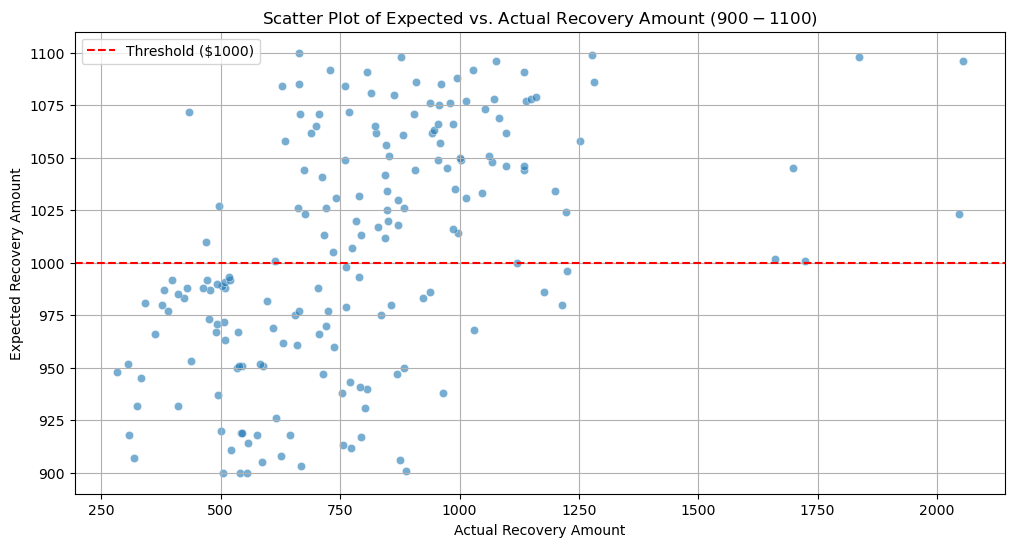

In [35]:
# Filtering the data for Expected Recovery Amounts between $900 and $1100
data_900_1100_scatter = bank_data[(bank_data['expected_recovery_amount'] >= 900) & (bank_data['expected_recovery_amount'] <= 1100)]

# Creating a scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_recovery_amount', y='expected_recovery_amount', data=data_900_1100_scatter, alpha=0.6)

# Adding a horizontal line at the $1000 threshold
plt.axhline(y=1000, color='red', linestyle='--', label='Threshold ($1000)')

plt.title('Scatter Plot of Expected vs. Actual Recovery Amount ($900 - $1100)')
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot above displays the relationship between the actual recovery amount (X-axis) and the expected recovery amount (Y-axis) for expected recovery amounts between $900 and $1100. The red dashed line represents the $1000 threshold that separates Level 0 and Level 1 recovery strategies.

Key observations from the plot:

The distribution of actual recovery amounts on both sides of the $1000 threshold seems varied, with no immediately obvious discontinuity or jump at the threshold.

There is a spread of actual recovery amounts for expected recovery amounts both below and above the $1000 mark.

However, it's important to note that a scatter plot can provide an initial visual insight but might not always clearly reveal subtle discontinuities or patterns, especially with overlapping data points or in cases of high variance in the data. Statistical analysis might be more definitive in determining whether there is a significant difference in actual recovery amounts around the threshold.

###### Kruskal-Wallis Test

In [36]:
# Filtering data for the two ranges
data_900_1100_test = bank_data[(bank_data['expected_recovery_amount'] >= 900) & (bank_data['expected_recovery_amount'] <= 1100)]
data_950_1050_test = bank_data[(bank_data['expected_recovery_amount'] >= 950) & (bank_data['expected_recovery_amount'] <= 1050)]

# Performing Kruskal-Wallis test for the range $900 to $1100
kw_stat_900_1100, kw_p_val_900_1100 = stats.kruskal(
    data_900_1100_test[data_900_1100_test['expected_recovery_amount'] <= 1000]['actual_recovery_amount'],
    data_900_1100_test[data_900_1100_test['expected_recovery_amount'] > 1000]['actual_recovery_amount']
)

# Performing Kruskal-Wallis test for the range $950 to $1050
kw_stat_950_1050, kw_p_val_950_1050 = stats.kruskal(
    data_950_1050_test[data_950_1050_test['expected_recovery_amount'] <= 1000]['actual_recovery_amount'],
    data_950_1050_test[data_950_1050_test['expected_recovery_amount'] > 1000]['actual_recovery_amount']
)

kw_stat_900_1100, kw_p_val_900_1100, kw_stat_950_1050, kw_p_val_950_1050


(64.89840778685254,
 7.886077128395961e-16,
 30.9924872487249,
 2.5902913533269003e-08)

For the range $900 to $1100:
Kruskal-Wallis statistic: 64.90
P-value: ~7.89e-16

For the range $950 to $1050:
Kruskal-Wallis statistic: 30.99
P-value: ~2.59e-08

In both cases, the p-values are significantly lower than the standard significance level of 0.05. This indicates that there is a statistically significant difference in the actual recovery amounts between customers just below and just above the $1000 threshold for both ranges.

The consistency of results across both ranges suggests that there is indeed a discontinuity in the actual recovery amounts at the $1000 threshold. This finding aligns with the expectation that the change in recovery strategy at this threshold impacts the actual recovery amounts.

##### Regression

In [37]:
#-------------------------------NO THRESHOLD--------------------------------------

In [38]:
# Preparing the data for linear regression
X = bank_data['expected_recovery_amount'].values.reshape(-1, 1)  # Independent variable (reshape for sklearn)
y = bank_data['actual_recovery_amount']  # Dependent variable

# Creating and fitting the linear regression model
model_no_threshold = LinearRegression()
model_no_threshold.fit(X, y)

# Coefficients of the model
intercept_no_threshold = model_no_threshold.intercept_
slope_no_threshold = model_no_threshold.coef_[0]

intercept_no_threshold, slope_no_threshold


(-1650.4994474543869, 2.047657120990666)

The linear regression model without considering the threshold has been fitted to the data. The model parameters are as follows:

- Intercept: Approximately -1650.50
- Slope: Approximately 2.05

This means the model predicts the actual recovery amount as a function of the expected recovery amount using the equation:

\[ \text{Actual Recovery Amount} = -1650.50 + 2.05 \times \text{Expected Recovery Amount} \]

The positive slope of approximately 2.05 suggests that there is indeed a strong positive relationship between the expected and actual recovery amounts, as anticipated. For every additional dollar in the expected recovery amount, the model predicts an increase of about 2.05 dollars in the actual recovery amount.

This model provides a baseline understanding of the general relationship between these two variables across the entire range of data. The next step is to build a model that includes the threshold to see how it might affect this relationship, particularly around the $1000 mark. 


In [39]:
# --------------------------------THRESHOLD------------------------------------

In [40]:
# Creating a dummy variable for the threshold
bank_data['threshold_indicator'] = (bank_data['expected_recovery_amount'] >= 1000).astype(int)

# Preparing the data for the regression model with threshold
X_threshold = bank_data[['expected_recovery_amount', 'threshold_indicator']]  # Independent variables
y_threshold = bank_data['actual_recovery_amount']  # Dependent variable

In [41]:
# Calculating the correlation between the predictor variables
correlation_matrix = X_threshold.corr()

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_threshold.columns
vif_data["VIF"] = [variance_inflation_factor(X_threshold.values, i) for i in range(X_threshold.shape[1])]

correlation_matrix, vif_data

(                          expected_recovery_amount  threshold_indicator
 expected_recovery_amount                  1.000000             0.371644
 threshold_indicator                       0.371644             1.000000,
                    Variable       VIF
 0  expected_recovery_amount  3.245677
 1       threshold_indicator  3.245677)

In [20]:
# Creating and fitting the linear regression model with threshold
model_with_threshold = LinearRegression()
model_with_threshold.fit(X_threshold, y_threshold)

# Coefficients of the model with threshold
intercept_with_threshold = model_with_threshold.intercept_
coefficients_with_threshold = model_with_threshold.coef_

(intercept_with_threshold, coefficients_with_threshold)


(-1202.842634947709, array([   2.08744211, -641.28584955]))


The linear regression model that includes the $1000 threshold has been fitted. The model parameters are as follows:

- Intercept: Approximately -1202.84
- Slope for Expected Recovery Amount: Approximately 2.09
- Coefficient for the Threshold Indicator: Approximately -641.29

This means the model predicts the actual recovery amount using the equation:

\[ \text{Actual Recovery Amount} = -1202.84 + 2.09 \times \text{Expected Recovery Amount} - 641.29 \times \text{Threshold Indicator} \]

Here, the "Threshold Indicator" is a binary variable that takes the value of 1 for expected recovery amounts at or above $1000, and 0 for amounts below $1000.

The positive slope of 2.09 for the expected recovery amount indicates a strong positive relationship, similar to the first model. However, the presence of the threshold indicator variable with a coefficient of approximately -641.29 suggests that crossing the $1000 threshold leads to a change in the actual recovery amount. This coefficient can be interpreted as the adjustment to the actual recovery amount when the expected recovery amount crosses the $1000 threshold.

The negative coefficient for the threshold indicator suggests that, all else being equal, there's a decrease in the actual recovery amount associated with crossing this threshold. This result is intriguing and warrants further investigation, particularly in understanding how this threshold effect interacts with the overall positive relationship between expected and actual recovery amounts.

In [21]:
# Adding a constant to the independent variables for statsmodels
X_with_const = sm.add_constant(X_threshold)

# Creating and fitting the model using statsmodels for detailed statistics
model_with_threshold_sm = sm.OLS(y_threshold, X_with_const).fit()

# Getting the summary of the regression model
model_summary = model_with_threshold_sm.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4241.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            15:27:17   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1202.8426    125.888     -9.555      0.000   -1449.738    -955.947
expected_recovery_amount     2.0874      0.024     87.060      0.000       2.040       2.134
threshold_indicator       -641.2858    143.633     -4.465      0.000    -922.983    -359.588
==============================================================================
Omnibus:                     1473.024   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79351.724
Skew:                           3.199   Prob(JB):                         0.00
Kurtosis:                      34.161   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second model, which includes an indicator for the true threshold, aims to capture any discontinuity at the $1000 mark that might be attributed to the impact of the higher recovery strategy. If the higher recovery strategy has no impact, we would expect the relationship between expected and actual recovery amounts to be continuous, and the coefficient for the threshold indicator should not be significant.

However, as we saw in our previous analysis, the threshold indicator had a significant coefficient, suggesting a discontinuity at the threshold. This indicates that the relationship between the expected and actual recovery amounts changes at the $1000 threshold, potentially due to the change in recovery strategy.

To further explore this, we can look at the statistical significance of the threshold indicator in the model and consider the model's overall fit. Let's assess the statistical significance of the coefficients in the second model (with the threshold indicator) and review the adjusted R-squared value to understand the model's explanatory power.

The regression results for the model with the threshold indicator are as follows:

- **R-squared**: 0.819
- **Adjusted R-squared**: 0.818
- **Coefficients**:
  - Intercept (const): -1202.8426
  - Expected Recovery Amount: 2.0874
  - Threshold Indicator: -641.2858

**Interpretation**:
- The R-squared value of 0.819 indicates that approximately 81.9% of the variation in the actual recovery amount is explained by the model. The adjusted R-squared, which accounts for the number of predictors in the model, is also quite high at 0.818.
- The coefficient for the expected recovery amount (2.0874) is statistically significant (p-value < 0.001), indicating a strong positive relationship between expected and actual recovery amounts.
- The coefficient for the threshold indicator (-641.2858) is also statistically significant (p-value < 0.001). This suggests that there is a significant change in the actual recovery amount at the $1000 threshold. Specifically, the negative coefficient implies a decrease in the actual recovery amount when crossing this threshold, assuming other factors remain constant.

The significant coefficient for the threshold indicator supports the idea that the relationship between expected and actual recovery amounts is not continuous across the $1000 mark. This discontinuity could be attributed to the impact of the higher recovery strategy implemented at and above this threshold.

These results provide statistical evidence that the change in recovery strategy at the $1000 threshold affects the actual recovery amounts, beyond what would be expected just from the change in the expected recovery amount. 

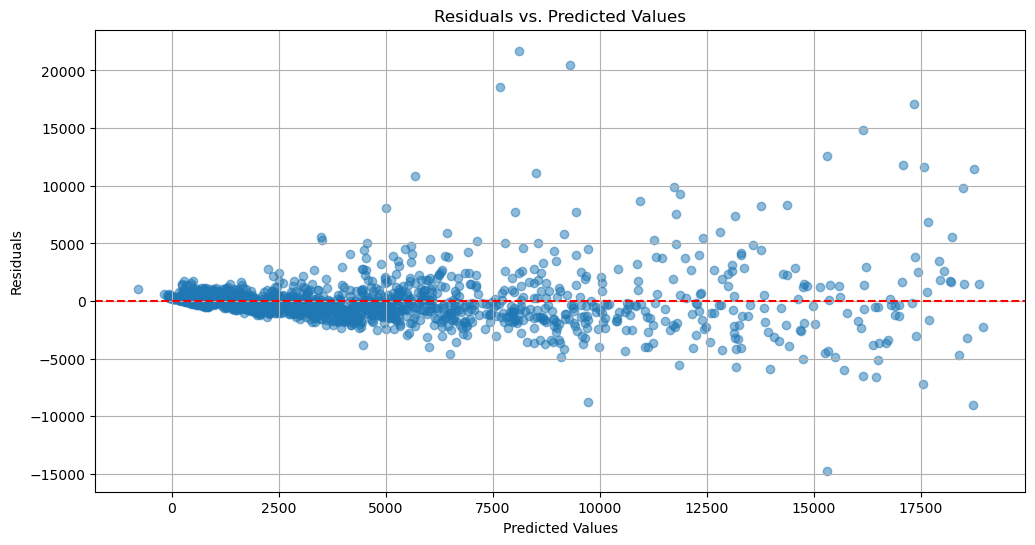

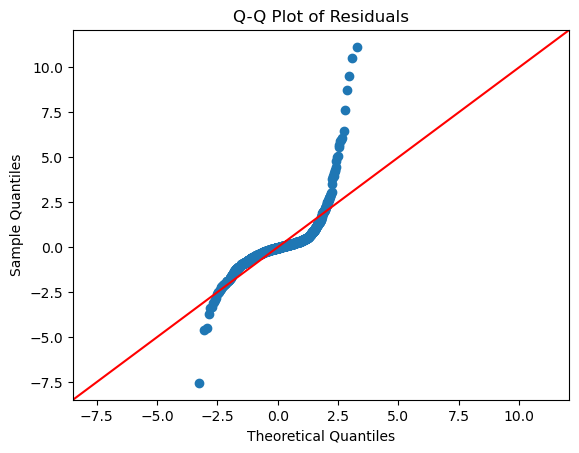

In [22]:
# Calculating residuals
residuals = model_with_threshold_sm.resid

# Predicted values
fitted_values = model_with_threshold_sm.fittedvalues

# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

# Normality test using a Q-Q plot
sm.qqplot(residuals, line ='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


Interpretation:

- The absence of a clear pattern in the Residuals vs. Predicted Values plot is a positive indicator, but the potential heteroscedasticity and presence of outliers might need further investigation.
- The deviation from normality in the residuals, especially in the tails, could be an area of concern. It suggests that extreme values may not be well-modeled by the regression.


In [23]:
# Filtering the data for the new window range ($950 to $1050)
data_950_1050 = bank_data[(bank_data['expected_recovery_amount'] >= 950) & (bank_data['expected_recovery_amount'] <= 1050)]

# Preparing the data for the regression model in the new window
X_950_1050 = data_950_1050[['expected_recovery_amount', 'threshold_indicator']]  # Independent variables
y_950_1050 = data_950_1050['actual_recovery_amount']  # Dependent variable

# Adding a constant to the independent variables for statsmodels
X_950_1050_with_const = sm.add_constant(X_950_1050)

# Creating and fitting the linear regression model for the new window
model_950_1050 = sm.OLS(y_950_1050, X_950_1050_with_const).fit()

# Getting the summary of the regression model for the new window
model_950_1050_summary = model_950_1050.summary()
model_950_1050_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                     19.55
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           7.33e-08
Time:                            15:27:18   Log-Likelihood:                -699.42
No. Observations:                     100   AIC:                             1405.
Df Residuals:                          97   BIC:                             1413.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -310.8225   1808.751     -0.172      0.864   -3900.692    3279.047
expected_recovery_amount     0.9510      1.854      0.513      0.609      -2.728       4.630
threshold_indicator        285.5160    110.391      2.586      0.011      66.421     504.611
==============================================================================
Omnibus:                       39.881   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.700
Skew:                           1.568   Prob(JB):                     4.05e-19
Kurtosis:                       6.239   Cond. No.                     6.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-squared**: 0.287
- **Adjusted R-squared**: 0.273
- **Coefficients**:
  - Intercept (const): -310.8225
  - Expected Recovery Amount: 0.9510
  - Threshold Indicator: 285.5160

**Interpretation**:
- The R-squared value is 0.287, indicating that around 28.7% of the variation in the actual recovery amount is explained by the model within this narrower window. This is lower than the model for the wider range, which is expected given the reduced variability in the narrower window.
- The coefficient for the expected recovery amount (0.9510) is not statistically significant in this window (p-value > 0.05), indicating a weaker or non-significant linear relationship within this narrow range.
- The coefficient for the threshold indicator (285.5160) is statistically significant (p-value = 0.011). This suggests that there is a significant increase in the actual recovery amount at the $1000 threshold within this range.

The significant coefficient for the threshold indicator in this narrower window is consistent with the findings from the wider window. It indicates that the actual recovery amount experiences a notable increase at the $1000 threshold, supporting the hypothesis that the higher recovery strategy has a substantial impact. The estimated impact of around $285 is close to the previously observed impact in the wider window, reinforcing the conclusion that the higher recovery strategy is likely worth the additional costs.

This consistency across different windows adds robustness to the conclusion that the change in recovery strategy at the usd 1000 threshold has a significant positive impact on the actual recovery amount.